D:\Users\songz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Users\songz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


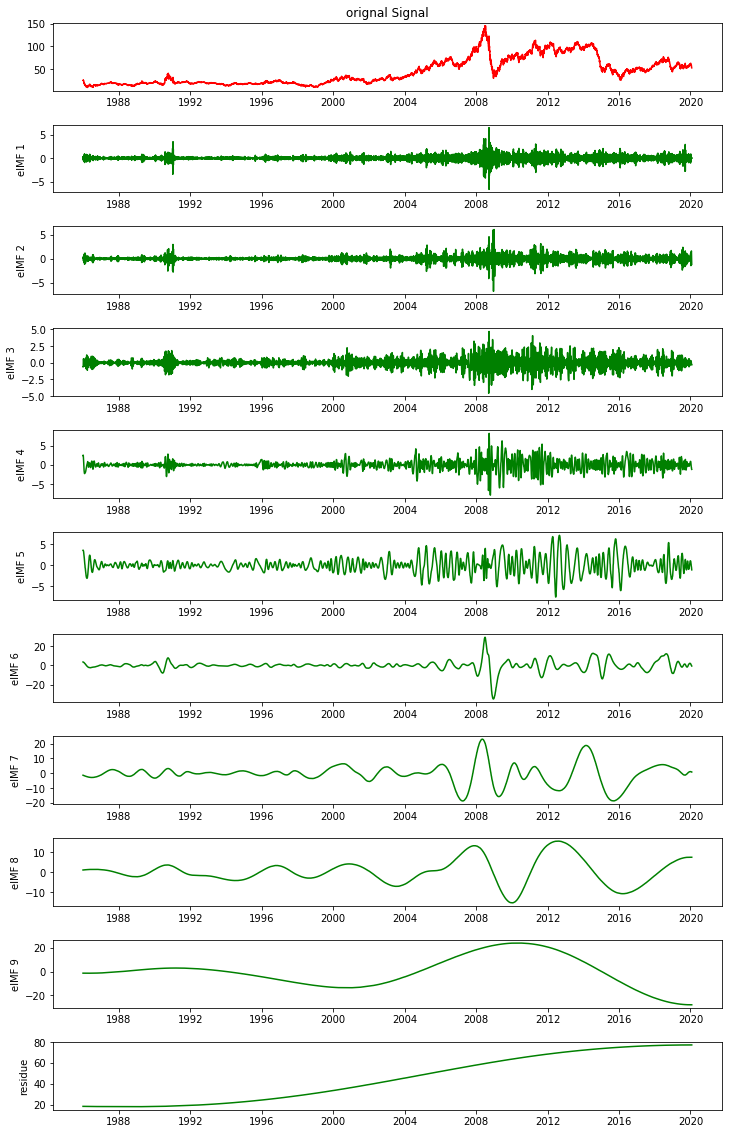

In [53]:
import numpy as np
from PyEMD import EMD, Visualisation
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel(r'F:/研究生阶段/毕业设计/RWTCd.xls',sheet_name='s')
S =data['WTI-Spot-Price'].as_matrix()
t=np.arange(0,len(S))
# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()
T=data['Date'].as_matrix()

IMF=pd.DataFrame()
IMF['Date']=T
for i in range(len(imfs)):
    s='imf'+str(i+1)
    IMF[s]=imfs[i]

IMF.to_excel(r'F:\研究生阶段\毕业设计\处理数据\EMD分解.xls')
# Plot results
plt.figure(figsize=(12,20))
plt.subplot(len(imfs)+1, 1, 1)
plt.title("orignal Signal")
plt.plot(T, S, 'r')
plt.subplots_adjust(hspace=0.5)

for n in range(len(imfs)-1):
    plt.subplot(len(imfs)+1, 1, n+2)
    plt.plot(T, imfs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.subplots_adjust(hspace=0.5)

plt.subplot(len(imfs)+1, 1, len(imfs)+1)
plt.plot(T, imfs[9], 'g')
plt.ylabel("residue")
plt.locator_params(axis='y',nbins=5)
    